In [1]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /anaconda3/lib/python3.7/site-packages (0.20.3)


In [2]:
import sklearn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
print(sklearn.__version__)

0.20.3


### Load and Explore Data


https://github.com/jbrownlee/Datasets/blob/master/pima-indians-diabetes.names

https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv

In [11]:
diabetes_df = pd.read_csv('datasets/diabetes.csv')

In [12]:
diabetes_df.shape

(768, 9)

In [13]:
diabetes_df.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
diabetes_df.describe()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
diabetes_df.dtypes

Pregnancies         int64
Glucose             int64
BP                  int64
Skin Thickness      int64
Insulin             int64
Mass              float64
Pedigree          float64
Age                 int64
class               int64
dtype: object

Text(0, 0.5, 'Plasma glucose concentration after 2 hours')

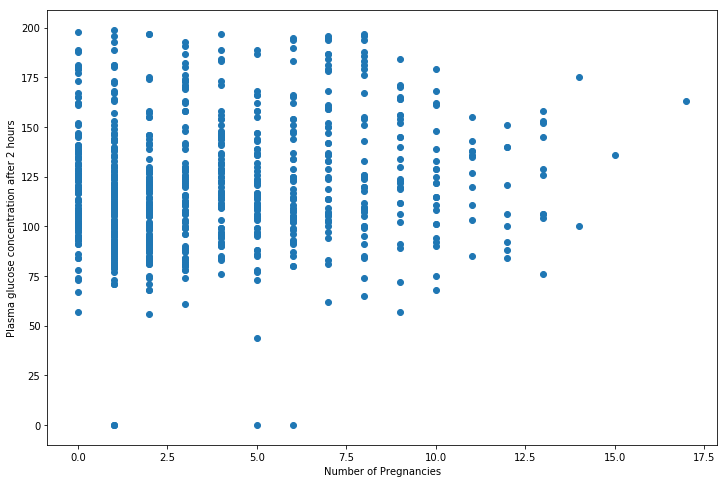

In [16]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(diabetes_df['Pregnancies'], diabetes_df['Glucose'])

plt.xlabel('Number of Pregnancies')
plt.ylabel('Plasma glucose concentration after 2 hours')

Text(0, 0.5, 'Diastolic blood pressure (mm Hg)')

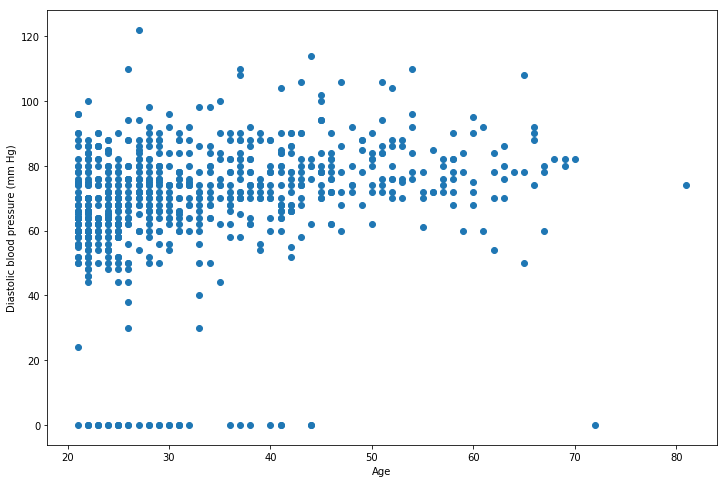

In [17]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(diabetes_df['Age'], diabetes_df['BP'])

plt.xlabel('Age')
plt.ylabel('Diastolic blood pressure (mm Hg)')

Text(0, 0.5, 'Diabetic or not')

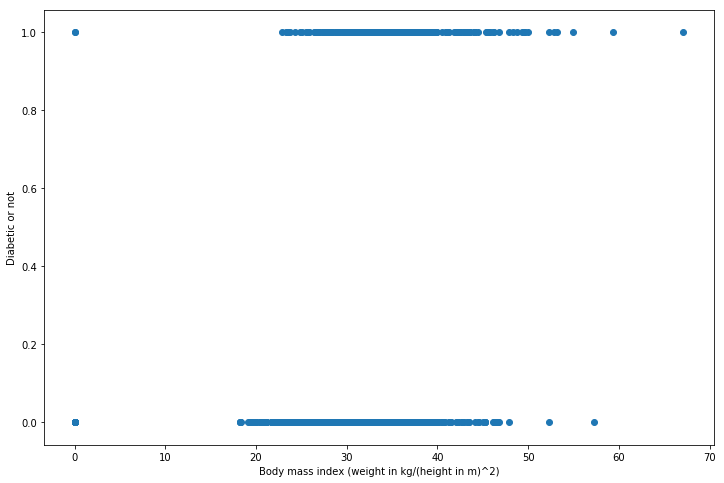

In [18]:
fig, ax = plt.subplots(figsize = (12, 8))

plt.scatter(diabetes_df['Mass'], diabetes_df['class'])

plt.xlabel('Body mass index (weight in kg/(height in m)^2)')
plt.ylabel('Diabetic or not')

In [20]:
diabetes_corr = diabetes_df.corr()

diabetes_corr

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age,class
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
Skin Thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
Mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


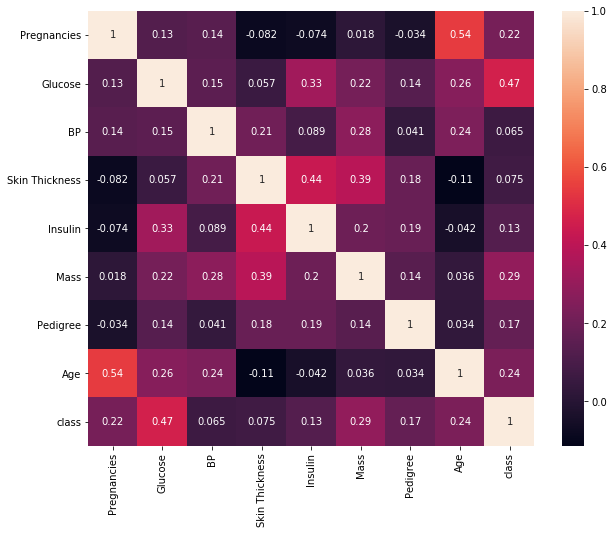

In [23]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(diabetes_corr, annot = True)

In [24]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('class',axis=1)
Y = diabetes_df['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [25]:
print("train x shape,", x_train.shape)
print("train y shape,", y_train.shape)

train x shape, (614, 8)
train y shape, (614,)


In [26]:
print("test x shape, ", x_test.shape)
print("test y shape, ", y_test.shape)

test x shape,  (154, 8)
test y shape,  (154,)


In [27]:
x_train.head()

,Pregnancies,Glucose,BP,Skin Thickness,Insulin,Mass,Pedigree,Age
436,12,140,85,33,0,37.4,0.244,41
608,0,152,82,39,272,41.5,0.270,27
242,3,139,54,0,0,25.6,0.402,22
466,0,74,52,10,36,27.8,0.269,22
634,10,92,62,0,0,25.9,0.167,31


In [28]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(solver = 'liblinear')

In [29]:
classifier.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
print(classifier.coef_)

[[ 1.19430963e-01  2.66039346e-02 -1.73575325e-02  3.22792280e-04
  -6.66722260e-04  5.44701729e-02  7.09931977e-01  8.40663716e-03]]


### Test Model

In [31]:
y_pred = classifier.predict(x_test)

In [32]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [33]:
pred_results.head()

,y_test,y_pred
679,0,0
241,0,0
341,0,0
287,1,0
43,1,1


In [34]:
diabetes_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

diabetes_crosstab

y_test,0,1
y_pred,,
0,97,24
1,6,27


### Precision-recall scores

When we use these for multiclass classification we need to specify an averaging method to determine how the precision and recall scores for different labels should be weighted

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [36]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.8051948051948052
precision_score :  0.8181818181818182
recall_score :  0.5294117647058824
